In [186]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
#coding=utf-8
%autoreload
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
import numpy as np
from  EIOptimizer import EIOptimizer
%matplotlib inline

In [188]:
N = 200
X = np.random.rand(N , 2)*5
X.shape
y = np.sin(X[:, 0]*5)*np.cos(X[:, 1]*1.5) + 0.1*np.random.randn(N ) # toy function

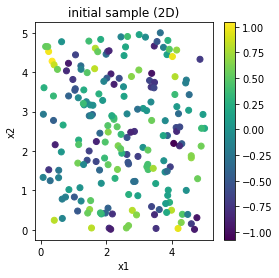

In [189]:
plt.figure(figsize = (4, 4))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.colorbar()
plt.title('initial sample (2D)')
plt.xlabel('x1')
plt.ylabel('x2')

In [190]:
EIOpt = EIOptimizer()

In [191]:
EIOpt.fit(X, y, bounds = [(0, 5)]*2, num_restarts=10)

In [192]:
x1, x2 = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))

In [193]:
ys = EIOpt.y_scaler.inverse_transform(EIOpt.gp_model.predict(np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1))))[0])

In [194]:
EIOpt.gp_model

GP_regression.,value,constraints,priors
rbf.variance,1.86967343002,"0.001,100.0",
rbf.lengthscale,"(2,)","0.001,10.0",
Gaussian_noise.variance,0.0303376028383,"0.0001,10.0",


In [195]:
EIOpt.gp_model.kern.lengthscale

index,GP_regression.rbf.lengthscale,constraints,priors
[0],0.06460096,"0.001,10.0",
[1],0.20221315,"0.001,10.0",


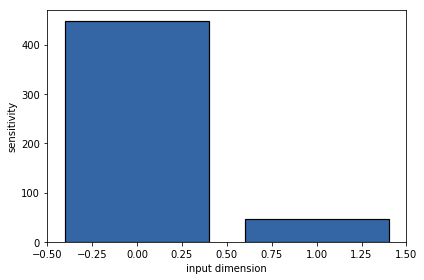

In [196]:
EIOpt.gp_model.kern.plot_ARD()

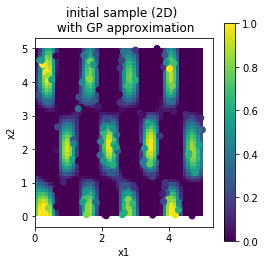

In [197]:
plt.figure(figsize = (4, 4))
plt.imshow(ys.reshape(50, 50), extent=[0,5,0,5], origin='min')
plt.clim([0, 1])
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.clim([0, 1])
plt.colorbar()
plt.title('initial sample (2D) \n with GP approximation')
plt.xlabel('x1')
plt.ylabel('x2')

In [198]:
sampled = EIOpt.sample(30, population_factor=5)

In [199]:
sampled

array([[ 0.29353728,  2.05494048],
       [ 4.81774877,  0.        ],
       [ 4.08182447,  2.05575688],
       [ 2.21095185,  4.18574527],
       [ 3.46725717,  4.16272981],
       [ 2.82029179,  2.1158848 ],
       [ 0.91206403,  4.16751262],
       [ 1.59372476,  2.11550018],
       [ 2.17767872,  0.        ],
       [ 0.96248206,  0.10162479],
       [ 3.45429273,  0.13813156],
       [ 4.69508385,  4.46022242],
       [ 4.70166687,  3.9033042 ],
       [ 4.08846121,  1.52638111],
       [ 1.60242134,  2.68789593],
       [ 4.08796619,  2.71390309],
       [ 2.17594523,  0.64279496],
       [ 0.88944672,  3.4234159 ],
       [ 1.59364884,  1.39038047],
       [ 0.        ,  0.        ],
       [ 0.        ,  4.56538745],
       [ 5.        ,  3.21271689],
       [ 5.        ,  1.47840061],
       [ 0.11603763,  0.58689645],
       [ 5.        ,  2.56967209],
       [ 4.0835024 ,  2.31735071],
       [ 2.21485145,  3.84950934],
       [ 3.46178137,  3.8870756 ],
       [ 4.76726152,

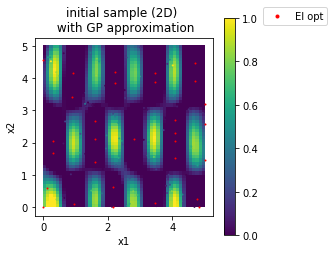

In [200]:
plt.figure(figsize = (4, 4))
plt.imshow(ys.reshape(50, 50), extent=[0,5,0,5], origin='min')
plt.clim([0, 1])
plt.scatter(X[:, 0], X[:, 1], c = y, s = 1)
plt.clim([0, 1])
plt.colorbar()
plt.scatter(sampled[:, 0], sampled[:, 1], color = 'r', s = 1, label = 'EI opt')
plt.legend(loc = 2, bbox_to_anchor = (1.25, 1.2), markerscale = 3.)
plt.title('initial sample (2D) \n with GP approximation')
plt.xlabel('x1')
plt.ylabel('x2')